<a href="https://colab.research.google.com/github/Navaneeth1174/2105a42022/blob/main/PROJECT%20AIML%20TEAM%205%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**MOUNTING GOOGLE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**LOAD DATA**

In [3]:
from google.colab import drive
data = pd.read_csv("/content/drive/MyDrive/Book4.csv")

In [4]:
data.head()

,Game,Genre,MULTI PLAYER,ROLE PLAY,North America,Europe,Japan,Global
0,Tekken 7,Action-Adventure,NO,YES,0.30,0.23,0.00,0.58
1,Grand Theft Auto V,Action-Adventure,NO,YES,4.70,3.25,0.01,8.72
2,Call of Duty: Black Ops 3,Shooter,YES,YES,4.63,2.04,0.02,7.37
3,Call of Duty: WWII,Shooter,YES,YES,3.75,1.91,0.00,6.23
4,Red Dead Redemption 2,Action-Adventure,YES,YES,3.76,1.47,0.00,5.77


**Top 10 best-selling game categories:**

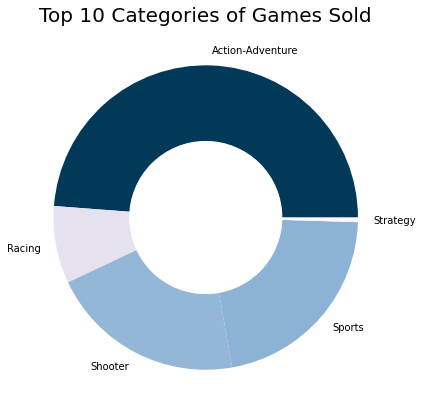

In [5]:
import matplotlib as mpl
game = data.groupby("Genre")["Global"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

We can see that the "Action & Adventure" genre is the most popular type of video game by far.
Therefore we can conclude that, "Genre" plays an very important role in the success of the game.

As the Name of the games doesn't really effect our predictions, we can safely remove them.

In [6]:
data = data.drop(labels='Game', axis=1)

CHECKING FOR NULL VALUES

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Genre          207 non-null    object 
 1   MULTI PLAYER   207 non-null    object 
 2   ROLE PLAY      207 non-null    object 
 3   North America  207 non-null    float64
 4   Europe         207 non-null    float64
 5   Japan          207 non-null    float64
 6   Global         207 non-null    float64
dtypes: float64(4), object(3)
memory usage: 11.4+ KB


In [8]:
data[:] = np.nan_to_num(data)
data

,Genre,MULTI PLAYER,ROLE PLAY,North America,Europe,Japan,Global
0,Action-Adventure,NO,YES,0.30,0.23,0.00,0.58
1,Action-Adventure,NO,YES,4.70,3.25,0.01,8.72
2,Shooter,YES,YES,4.63,2.04,0.02,7.37
3,Shooter,YES,YES,3.75,1.91,0.00,6.23
4,Action-Adventure,YES,YES,3.76,1.47,0.00,5.77
...,...,...,...,...,...,...,...
202,Shooter,YES,YES,0.18,0.00,0.00,0.21
203,Action-Adventure,YES,YES,0.10,0.09,0.00,0.20
204,Racing,YES,NO,0.01,0.18,0.00,0.20
205,Action-Adventure,YES,YES,0.12,0.06,0.00,0.20


In [9]:
print(data.describe())

       North America      Europe       Japan      Global
count     207.000000  207.000000  207.000000  207.000000
mean        0.734831    0.378213    0.002319    1.226425
std         0.845703    0.491969    0.006857    1.388059
min         0.010000    0.000000    0.000000    0.190000
25%         0.235000    0.090000    0.000000    0.365000
50%         0.410000    0.190000    0.000000    0.700000
75%         0.870000    0.430000    0.000000    1.550000
max         4.700000    3.250000    0.040000    8.720000


In [10]:
#data = data.drop([207], axis=0)
data

,Genre,MULTI PLAYER,ROLE PLAY,North America,Europe,Japan,Global
0,Action-Adventure,NO,YES,0.30,0.23,0.00,0.58
1,Action-Adventure,NO,YES,4.70,3.25,0.01,8.72
2,Shooter,YES,YES,4.63,2.04,0.02,7.37
3,Shooter,YES,YES,3.75,1.91,0.00,6.23
4,Action-Adventure,YES,YES,3.76,1.47,0.00,5.77
...,...,...,...,...,...,...,...
202,Shooter,YES,YES,0.18,0.00,0.00,0.21
203,Action-Adventure,YES,YES,0.10,0.09,0.00,0.20
204,Racing,YES,NO,0.01,0.18,0.00,0.20
205,Action-Adventure,YES,YES,0.12,0.06,0.00,0.20


**Binary Conversion**

In [11]:
varlist =  ['ROLE PLAY']
def binary_map(x):
    return x.map({'YES': 1, 'NO': 0})
data[varlist] = data[varlist].apply(binary_map)

varlist1 =  ['MULTI PLAYER']
def binary_map(x):
    return x.map({'YES': 1, 'NO': 0})
data[varlist1] = data[varlist1].apply(binary_map)
data


,Genre,MULTI PLAYER,ROLE PLAY,North America,Europe,Japan,Global
0,Action-Adventure,0,1,0.30,0.23,0.00,0.58
1,Action-Adventure,0,1,4.70,3.25,0.01,8.72
2,Shooter,1,1,4.63,2.04,0.02,7.37
3,Shooter,1,1,3.75,1.91,0.00,6.23
4,Action-Adventure,1,1,3.76,1.47,0.00,5.77
...,...,...,...,...,...,...,...
202,Shooter,1,1,0.18,0.00,0.00,0.21
203,Action-Adventure,1,1,0.10,0.09,0.00,0.20
204,Racing,1,0,0.01,0.18,0.00,0.20
205,Action-Adventure,1,1,0.12,0.06,0.00,0.20


**Categorial Conversion**

In [12]:
status = pd.get_dummies(data['Genre'], drop_first = False)
data = pd.concat([data, status], axis = 1)
data.drop(['Genre'], axis = 1, inplace = True)
data

,MULTI PLAYER,ROLE PLAY,North America,Europe,Japan,Global,Action-Adventure,Racing,Shooter,Sports,Strategy
0,0,1,0.30,0.23,0.00,0.58,1,0,0,0,0
1,0,1,4.70,3.25,0.01,8.72,1,0,0,0,0
2,1,1,4.63,2.04,0.02,7.37,0,0,1,0,0
3,1,1,3.75,1.91,0.00,6.23,0,0,1,0,0
4,1,1,3.76,1.47,0.00,5.77,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
202,1,1,0.18,0.00,0.00,0.21,0,0,1,0,0
203,1,1,0.10,0.09,0.00,0.20,1,0,0,0,0
204,1,0,0.01,0.18,0.00,0.20,0,1,0,0,0
205,1,1,0.12,0.06,0.00,0.20,1,0,0,0,0


**DATA SPLIT**

In [13]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

**Data Normalization**

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['North America', 'Europe', 'Japan','Global']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_train

,MULTI PLAYER,ROLE PLAY,North America,Europe,Japan,Global,Action-Adventure,Racing,Shooter,Sports,Strategy
110,1,1,0.078891,0.067692,0.00,0.055100,1,0,0,0,0
168,1,1,0.029851,0.033846,0.00,0.011723,1,0,0,0,0
1,0,1,1.000000,1.000000,0.25,1.000000,1,0,0,0,0
167,1,1,0.036247,0.027692,0.00,0.012896,0,0,1,0,0
192,1,1,0.034115,0.009231,0.00,0.003517,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
87,1,1,0.117271,0.046154,0.00,0.070340,1,0,0,0,0
103,1,1,0.093817,0.058462,0.00,0.059789,0,1,0,0,0
67,1,1,0.134328,0.129231,0.00,0.113716,1,0,0,0,0
24,1,1,0.343284,0.258462,0.00,0.295428,0,0,1,0,0


**Input - Output Data Split**

In [15]:
y_train = df_train.pop('Global')
X_train = df_train
y_test = df_test.pop('Global')
X_test = df_test

**Model Training**

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
m = regressor.coef_
c = regressor.intercept_,
print("Estimated model weights, m:" , m)
print("Estimated model intercept, c:" , c)

Estimated model weights, m: [-3.52102804e-04 -6.23800751e-04  6.16012542e-01  4.03550367e-01
  4.93947618e-03  2.17352708e-06 -2.26977831e-04  7.64654885e-05
  1.48338815e-04  0.00000000e+00]
Estimated model intercept, c: (-0.020027266355481743,)


**Prediction on Training and Testing Data**

In [18]:
y_pred_test =  regressor.predict(X_test)
y_pred_train =  regressor.predict(X_train)

**Error Metrics Computation**

In [19]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 0.000607990345327717
Mean square error 3.6965226001171666e-07
Mean absolute error 0.0004939734967318723


In [20]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 0.00908530889788954
Mean square error 8.254283777007086e-05
Mean absolute error 0.00532258613680729


**Save Model**

In [21]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

**Deployment**

In [24]:
list_of_columns = data.columns
input_data=pd.DataFrame(columns=list_of_columns)
input_data.drop(['Global'], axis='columns', inplace=True)

input_data.at[0, 'MULTI PLAYER'] = input('IS IT MULTIPLAYER =')
input_data.at[0, 'ROLE PLAY'] = input('IS IT ROLE PLAY =')
input_data.at[0, 'Action-Adventure'] = input('IS IT Adventure =')
input_data.at[0, 'Racing'] = input('IS IT Racing =')
input_data.at[0, 'Shooter'] = input('IS IT Shooter =')
input_data.at[0, 'Sports'] = input('IS IT SPORTS =')
input_data.at[0, 'Strategy'] = input('IS IT STRATEGY =')

input_data.at[0, 'North America'] = float(input('Enter North America sales in Thousands ='))
input_data.at[0, 'Europe'] = float(input('Enter Europe sales in Thousands ='))
input_data.at[0, 'Japan'] = float(input('Enter Japan sales in Thousands ='))





# Converting the categorical variable into numerical
varlist =  ['MULTI PLAYER', 'ROLE PLAY',  'Sports','Strategy','Action-Adventure','Racing','Shooter']

# Defining the map function
def binary_map(x):
    return x.map({'YES': 1, 'NO': 0})

# Applying the function to the data list
input_data[varlist] = input_data[varlist].apply(binary_map)


input_data['North America']=(input_data['North America']-data['North America'].min())/(data['North America'].max()-0.5*(data['North America'].min()))
input_data['Europe']=(input_data['Europe']-data['Europe'].min())/(data['Europe'].max()-0.25*(data['Europe'].min()))
input_data['Japan']=(input_data['Japan']-data['Japan'].min())/(data['Japan'].max()-data['Japan'].min())



y_pred =regressor.predict(input_data)
Global=y_pred*(data['Global'].max()-data['Global'].min())+100*(data['Global'].min())
print('Predict.ed sales in Global wise =',Global)



IS IT MULTIPLAYER =NO
IS IT ROLE PLAY =NO
IS IT Adventure =NO
IS IT Racing =YES
IS IT Shooter =NO
IS IT SPORTS =NO
IS IT STRATEGY =NO
Enter North America sales in Thousands =12
Enter Europe sales in Thousands =23
Enter Japan sales in Thousands =21
Predict.ed sales in Global wise = [78.72728645]


In [25]:
model = pickle.load(open('model.pkl', 'rb'))
prediction = model.predict(input_data)
result = prediction[0]
Global=result*(data['Global'].max()-data['Global'].min())+100*(data['Global'].min())
print('Global sales',Global)

Global sales 78.72728645128753


**THANK YOU**